In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
%ls

Position_Salaries.csv   regression_template.R   svr.R
SVR.ipynb               regression_template.py  svr.py


In [4]:
dataset = pd.read_csv('Position_Salaries.csv')

In [5]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
X = dataset.loc[:,['Level']].values
y = dataset.loc[:,'Salary'].values

In [7]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


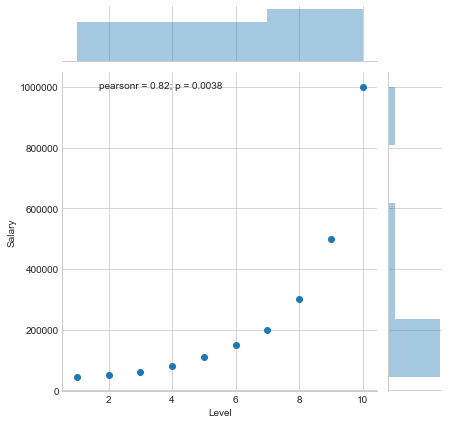

In [8]:
sns.jointplot(x=dataset['Level'], y=dataset['Salary'])

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [10]:
regressor.fit(X,y)
y_pred = regressor.predict(X)

In [11]:
regressor.predict(6.5)

array([130001.55760156])

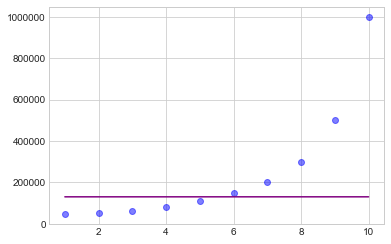

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y, alpha = 0.5, color="Blue")
ax.plot(X, y_pred, color = "Purple")

パラメータに対して正規化をしていないため、精度がよくない。
SVRの場合、必ずfeature scalingをすること

In [13]:
X = dataset.loc[:,['Level']].values
y = dataset.loc[:,['Salary']].values

In [14]:
y.shape

(10, 1)

In [15]:
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler()
y_sd = StandardScaler()

In [16]:
X = X_sd.fit_transform(X)
y = y_sd.fit_transform(y)

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConvers

In [17]:
y.flatten()

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [18]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
y_pred = regressor.predict(X)

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


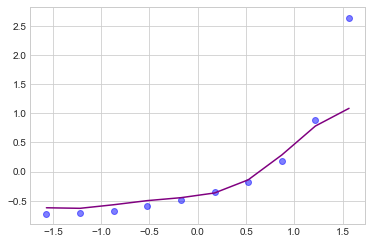

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y, alpha = 0.5, color="Blue")
ax.plot(X, y_pred, color = "Purple")

In [20]:
pred_6_5 = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

NameError: name 'sc_y' is not defined

In [21]:
pred_6_5

NameError: name 'pred_6_5' is not defined

In [22]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
